In [89]:
import os.path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from _lib.raman_lib.visualization import boxplot_comparison

# Setup

In [90]:
dataset = "HL_428_C_E"

In [91]:
starting_dirs = ["GroupKCV", "RepeatedKFold", "StratifiedK", "unstratifiedK"]
results_path = "result"


In [92]:
data = {}
for d in starting_dirs:
    data[d] = pd.read_csv(os.path.join(d,results_path, dataset, dataset + "_preprocessed.csv"))


# Quality Control

In [93]:
qc_results = {}
for d in starting_dirs:
    qc_results[d] = pd.read_csv(os.path.join(d,results_path, dataset, dataset + "_qc_scores.csv"))

for k,v in qc_results.items():
    print(k+": \n",v.describe(),"\n")

GroupKCV: 
        Median Height     N Peaks
count     835.000000  835.000000
mean      820.576912   19.237126
std       760.517431    8.149315
min         0.000000    0.000000
25%       328.231236   14.000000
50%       623.163677   20.000000
75%      1046.776115   25.000000
max      7925.905007   38.000000 

RepeatedKFold: 
        Median Height     N Peaks
count     835.000000  835.000000
mean      820.576912   19.237126
std       760.517431    8.149315
min         0.000000    0.000000
25%       328.231236   14.000000
50%       623.163677   20.000000
75%      1046.776115   25.000000
max      7925.905007   38.000000 

StratifiedK: 
        Median Height     N Peaks
count     835.000000  835.000000
mean      820.576912   19.237126
std       760.517431    8.149315
min         0.000000    0.000000
25%       328.231236   14.000000
50%       623.163677   20.000000
75%      1046.776115   25.000000
max      7925.905007   38.000000 

unstratifiedK: 
        Median Height     N Peaks
count    

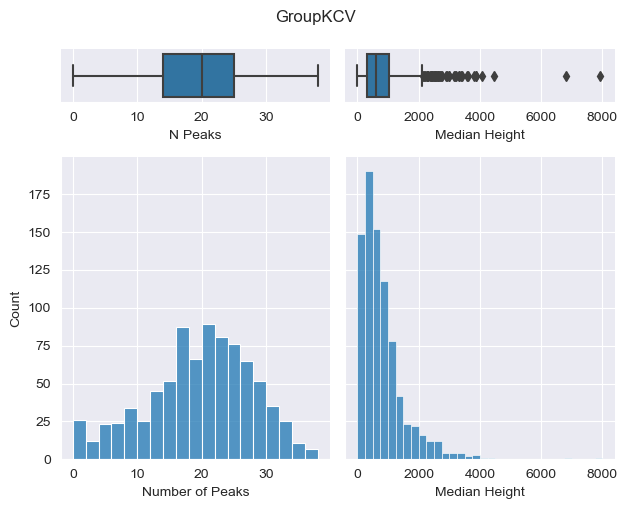

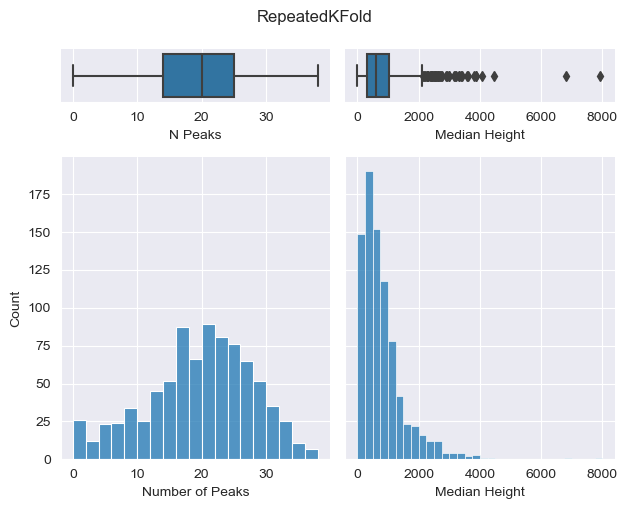

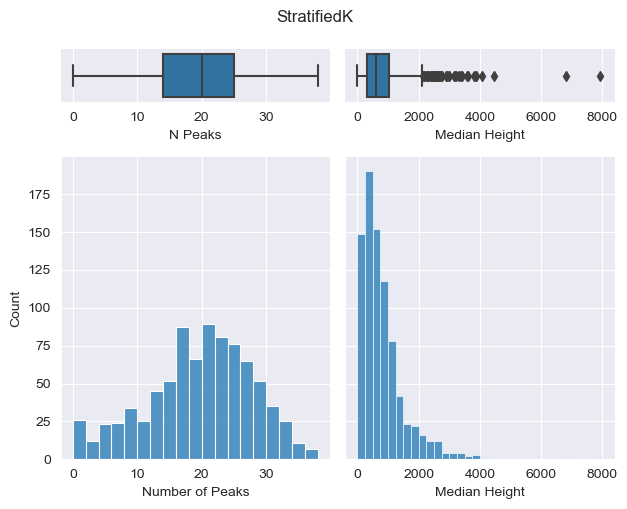

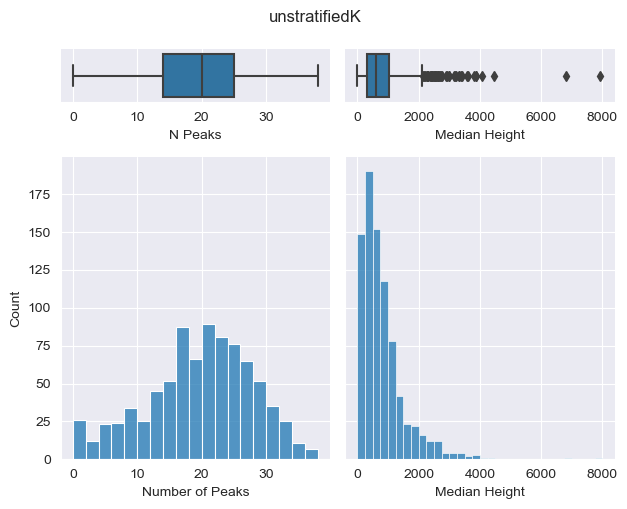

In [94]:
for r in qc_results.keys():
    fig, ((ax_box1, ax_box2), (ax_hist1, ax_hist2)) = plt.subplots(
        2, 2, sharex="col", sharey="row", gridspec_kw={"height_ratios": (.15, .85)})
    
    sns.boxplot(x=qc_results[r].iloc[:,1], ax=ax_box1)
    sns.boxplot(x=qc_results[r].iloc[:,0], ax=ax_box2)
    sns.histplot(qc_results[r].iloc[:,1], ax=ax_hist1, binrange=None, binwidth=2)
    sns.histplot(qc_results[r].iloc[:,0], ax=ax_hist2, binrange=None, binwidth=250)
    
    ax_box1.set(yticks=[])
    ax_box2.set(yticks=[])
    sns.despine(ax=ax_hist1)
    sns.despine(ax=ax_hist2)
    sns.despine(ax=ax_box1, left=True)
    sns.despine(ax=ax_box2, left=True)
    
    ax_hist1.set_xlabel("Number of Peaks")
    ax_hist2.set_xlabel(qc_results[r].columns[0])
    
    #ax_hist1.set_ylim([None, ymax_peaks])
    #ax_hist2.set_ylim([None, ymax_score])
    
    ax_box1.tick_params(axis="x", labelbottom=True)
    ax_box2.tick_params(axis="x", labelbottom=True)
    fig.tight_layout()
    fig.suptitle(r, y=1.05)

# Load Accuracy Files

In [95]:
accs = {}
acc_file = "mean_test_accuracy.csv"

lda = "lda_dim_reduction"
lda_subdirs= [ "lda", "fa_lda", "pca_lda", "peak_lda" ]

reg = "regularized_models"
reg_subdirs = ["logreg_l1", "logreg_l2", "svm_l1", "svm_l2"]

tree = "tree_based_models"
tree_subdrirs = ["decision_tree", "random_forest", "gbdt"]

load the data from the csv files and put it into a list first
they value count differs so a jagged dataframe needs to be created

In [96]:
for d in starting_dirs:
    data = {}
    for s in lda_subdirs:
        tmp_data = pd.read_csv(os.path.join(d,results_path, dataset,lda,s,acc_file ), header='infer', index_col=0)
        data[s] = tmp_data['0'].values.tolist()
        
    for s in reg_subdirs:
        tmp_data = pd.read_csv(os.path.join(d,results_path, dataset,reg,s,acc_file ), header='infer', index_col=0)
        data[s] = tmp_data['0'].values.tolist()
        
    for s in tree_subdrirs:
        tmp_data = pd.read_csv(os.path.join(d,results_path, dataset,tree,s,acc_file ), header='infer', index_col=0)
        data[s] = tmp_data['0'].values.tolist()
        
    accs[d]=data


In [97]:
accs_df = {}
for d in starting_dirs:
    df_list = []
    for key in accs[d]:
        df_list.append(pd.DataFrame(accs[d][key], columns=[key]))
    accs_df[d] = pd.concat(df_list, axis=1)

accs=accs_df



# Create Boxplot with accuracy values

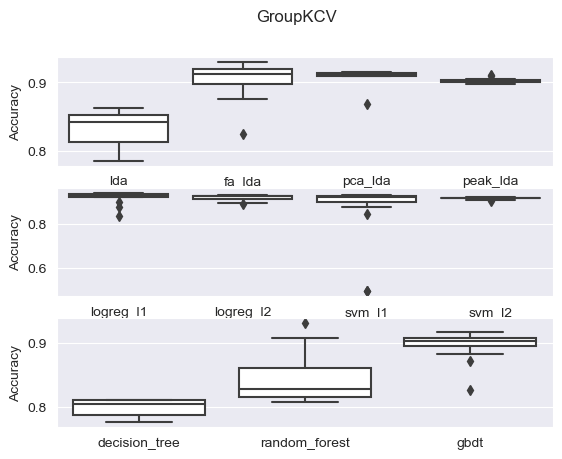

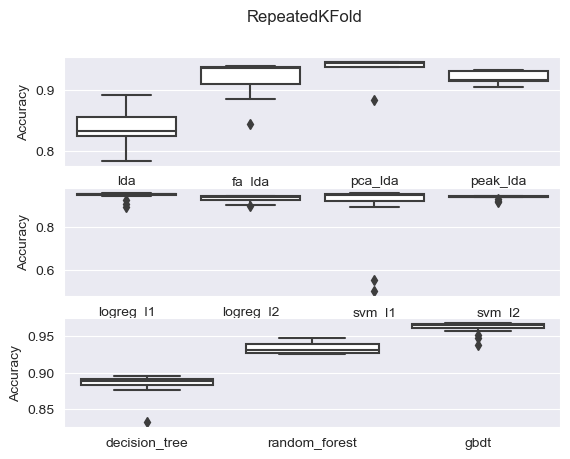

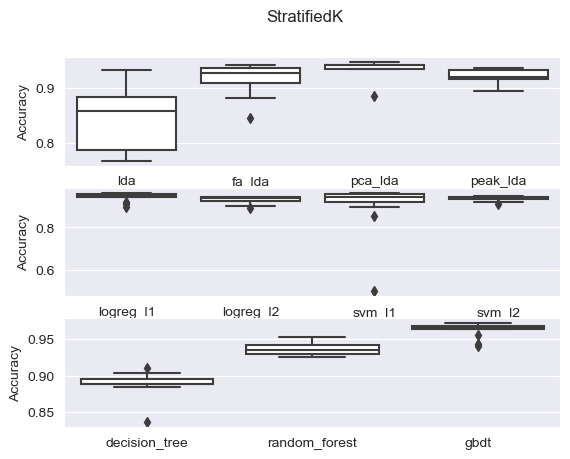

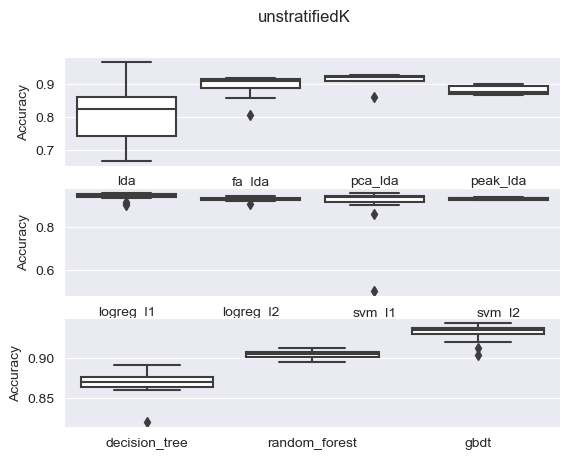

In [98]:
for d in starting_dirs:
    fig, ((ax_box1), (ax_box2), (ax_box3)) = plt.subplots(
        nrows=3, ncols=1)
    boxplot_comparison(accs[d], regex="lda", ax=ax_box1)
    ax_box1.set_ylabel('Accuracy')
    
    boxplot_comparison(accs[d], regex="logreg|svm", ax=ax_box2)
    ax_box2.set_ylabel('Accuracy')

    boxplot_comparison(accs[d], regex="tree|gbdt|forest", ax=ax_box3)
    ax_box3.set_ylabel('Accuracy')

    fig.suptitle(d)

In [99]:
os.system('jupyter nbconvert --to html analysis.ipynb')

[NbConvertApp] Converting notebook analysis.ipynb to html
[NbConvertApp] Writing 602970 bytes to analysis.html


0